## 쿠팡 크롤링

In [2]:
# 라이브러리 불러오기
from selenium import webdriver # 브라우저 자동화를 위한 모듈
import requests # HTTP 요청을 보내기 위한 모듈
from bs4 import BeautifulSoup as bs # HTML 내용 파싱을 위한 모듈
import pandas as pd # 데이터 조작 및 분석을 모듈
import time # 코드 실행 속도 조절을 위한 모듈
import re # 정규 표현식 사용을 위한 모듈
import pickle # 파이썬 객체 직렬화를 위한 모듈
from selenium.webdriver.common.by import By # 다양한 방법으로 엘리먼트를 찾기 위한 모듈
import datetime # 날짜와 시간 연산을 위한 모듈

C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lnyln\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [31]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

# 크롬 드라이버 로드
driver = webdriver.Chrome()

# 각 리스트 초기화
title = []  # 상품 제목 리스트
price = []  # 가격 리스트
review_cnt = []  # 리뷰 개수 리스트

driver.get('https://www.coupang.com/np/categories/486253?listSize=120&brand=&offerCondition=&filterType=rocket_luxury%2Crocket%2Ccoupang_global&isPriceRange=false&minPrice=&maxPrice=&page=10&channel=user&fromComponent=N&selectedPlpKeepFilter=&sorter=bestAsc&filter=&component=486153&rating=0&rocketAll=true')
time.sleep(3)  # 페이지가 완전히 로드될 때까지 대기

# 스크롤하여 모든 데이터를 로드
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # 스크롤 후 로딩 대기
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# 페이지 소스를 가져와서 BeautifulSoup으로 파싱
soup = bs(driver.page_source, 'html.parser')

# 상품 정보 크롤링
items = soup.find_all('dl', class_='baby-product-wrap adjust-spacing')
for item in items:
    # 제목 (제품 이름)
    try:
        a = item.find('div', class_='name').get_text(strip=True)
    except:
        a = 'null'
    title.append(a)

    # 가격
    try:
        b = item.find('strong', class_='price-value').get_text(strip=True)
    except:
        b = 'null'
    price.append(b)

    # 리뷰 개수
    try:
        c = item.find('span', class_='rating-total-count').get_text(strip=True)
    except:
        c = 'null'
    review_cnt.append(c)

# 드라이버 종료
driver.quit()

# 크롤링한 데이터를 데이터프레임으로 변환
raw_data = pd.DataFrame({
    'title': title,
    'price': price,
    'review_cnt': review_cnt
})

# 결과 출력
print(raw_data)

# CSV파일로 저장
raw_data.to_csv("d10.csv", index = False, encoding="utf-8-sig")

Empty DataFrame
Columns: [title, price, review_cnt]
Index: []


In [32]:
d1 = pd.read_csv("d1.csv")
d2 = pd.read_csv("d2.csv")
d3 = pd.read_csv("d3.csv")
d4 = pd.read_csv("d4.csv")
d5 = pd.read_csv("d5.csv")
d6 = pd.read_csv("d6.csv")
d7 = pd.read_csv("d7.csv")
d8 = pd.read_csv("d8.csv")
d9 = pd.read_csv("d9.csv")

coopang = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9], ignore_index=True)

In [33]:
coopang

,title,price,review_cnt
0,"AHC 바이탈 골든 콜라겐 크림, 50g, 2개","11,880",(17610)
1,"이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개","17,020",(3653)
2,"에스트라 아토베리어365 크림 플러스, 90ml, 1개","29,500",(9511)
3,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개","22,870",(52021)
4,"라운드랩 1025 독도 크림, 80ml, 1개","9,480",(6050)
...,...,...,...
1017,메이베나 73주름크림 고단백크림 탄력개선 단백질크림 눈가주름 탄력크림 팔자주름 주름...,"25,800",(301)
1018,"닥터자르트 시카페어 인텐시브 수딩 리페어 크림, 50ml, 2개","48,100",(642)
1019,"맑을담 워터 베이스 수분 크림, 90ml, 2개","20,600",(55)
1020,"닥터마르시 그린 센텔라 시카 리페어 크림, 50ml, 4개","117,600",(923)


## 전처리

In [35]:
#숫자화
for i in range(len(coopang)):

    # price에서 숫자를 제외한 모든 문자를 삭제
    coopang['price'][i] = re.sub("[^0-9]", "", str(coopang['price'][i]))
    
    # review_cnt에서 숫자를 제외한 모든 문자를 삭제
    coopang['review_cnt'][i] = re.sub("[^0-9]", "", str(coopang['review_cnt'][i]))
    
coopang

C:\Users\lnyln\AppData\Local\Temp/ipykernel_15772/2872072194.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  coopang['price'][i] = re.sub("[^0-9]", "", str(coopang['price'][i]))
C:\Users\lnyln\AppData\Local\Temp/ipykernel_15772/287207219

,title,price,review_cnt
0,"AHC 바이탈 골든 콜라겐 크림, 50g, 2개",11880,17610
1,"이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개",17020,3653
2,"에스트라 아토베리어365 크림 플러스, 90ml, 1개",29500,9511
3,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개",22870,52021
4,"라운드랩 1025 독도 크림, 80ml, 1개",9480,6050
...,...,...,...
1017,메이베나 73주름크림 고단백크림 탄력개선 단백질크림 눈가주름 탄력크림 팔자주름 주름...,25800,301
1018,"닥터자르트 시카페어 인텐시브 수딩 리페어 크림, 50ml, 2개",48100,642
1019,"맑을담 워터 베이스 수분 크림, 90ml, 2개",20600,55
1020,"닥터마르시 그린 센텔라 시카 리페어 크림, 50ml, 4개",117600,923


In [56]:
coopang = coopang.to_csv("coopang.csv", index = False, encoding="utf-8-sig")


AttributeError: 'NoneType' object has no attribute 'to_csv'

In [66]:
coopang = pd.read_csv("coopang.csv")
print(coopang)
coopang_notsame = pd.read_csv("coopang_notsame.csv")
print(coopang_notsame)

                                                  title   price  review_cnt
0                            AHC 바이탈 골든 콜라겐 크림, 50g, 2개   11880       17610
1               이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개   17020        3653
2                        에스트라 아토베리어365 크림 플러스, 90ml, 1개   29500        9511
3                   피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개   22870       52021
4                             라운드랩 1025 독도 크림, 80ml, 1개    9480        6050
...                                                 ...     ...         ...
1017  메이베나 73주름크림 고단백크림 탄력개선 단백질크림 눈가주름 탄력크림 팔자주름 주름...   25800         301
1018                닥터자르트 시카페어 인텐시브 수딩 리페어 크림, 50ml, 2개   48100         642
1019                         맑을담 워터 베이스 수분 크림, 90ml, 2개   20600          55
1020                   닥터마르시 그린 센텔라 시카 리페어 크림, 50ml, 4개  117600         923
1021                  프루트오브더얼스 알로에 베라 젤 노 알코올, 680g, 2개   28700         719

[1022 rows x 3 columns]
                                                 title  price  

In [113]:
import csv

def filter_rows(csv_file, keyword):
    filtered_rows = []
    with open(csv_file, 'r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if keyword in row["title"]:
                filtered_rows.append(row)
    return filtered_rows

# CSV 파일 경로
csv_file = 'test_coopang.csv'

# 원하는 단어
keyword = '1개'

# 선택한 단어가 포함된 행들 추출
filtered_rows = filter_rows(csv_file, keyword)

# 결과 출력
for row in filtered_rows:
    print(row)

print(len(filtered_rows))
print(len(coopang))

{'title': '이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개', 'price': '17020', 'review_cnt': '3653'}
{'title': '에스트라 아토베리어365 크림 플러스, 90ml, 1개', 'price': '29500', 'review_cnt': '9511'}
{'title': '피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개', 'price': '22870', 'review_cnt': '52021'}
{'title': '라운드랩 1025 독도 크림, 80ml, 1개', 'price': '9480', 'review_cnt': '6050'}
{'title': '에스트라 아토베리어365 하이드로 수딩 크림, 60ml, 1개', 'price': '19820', 'review_cnt': '1172'}
{'title': '닥터지 블랙 스네일크림, 50ml, 1개', 'price': '10010', 'review_cnt': '38321'}
{'title': '라로슈포제 시카플라스트 밤 B5+, 1개, 100ml', 'price': '21890', 'review_cnt': '1419'}
{'title': '어퓨 마데카소사이드 수분 젤 크림, 50ml, 1개', 'price': '8650', 'review_cnt': '881'}
{'title': '뷰티레시피 스노우화이트 멜라 스탑 화이트닝 크림, 80ml, 1개', 'price': '11370', 'review_cnt': '12126'}
{'title': '비플레인 멀티 히알루론산 수분 크림, 70ml, 1개', 'price': '13990', 'review_cnt': '849'}
{'title': 'AHC 바이탈 골든 콜라겐 크림, 50g, 1개', 'price': '6190', 'review_cnt': '17610'}
{'title': '나인위시스 하이드라 앰플 크림, 50ml, 1개', 'price': '9470', 'review_cnt': '19

In [112]:
import csv
import os

def filter_and_delete_rows(csv_file, keyword):
    temp_file = csv_file.replace('.csv', '_temp.csv')
    with open(csv_file, 'r', newline='', encoding='utf-8') as read_file, \
         open(temp_file, 'w', newline='', encoding='utf-8') as write_file:
        
        reader = csv.DictReader(read_file)
        if 'title' not in reader.fieldnames:
            raise ValueError("CSV 파일에 'title' 열이 없습니다.")
        
        writer = csv.DictWriter(write_file, fieldnames=reader.fieldnames)
        writer.writeheader()
        
        seen_titles = set()
        for row in reader:
            title = row['title']
            if keyword not in title and title not in seen_titles:
                writer.writerow(row)
                seen_titles.add(title)

    os.replace(temp_file, csv_file)

# CSV 파일 경로
csv_file = 'test_coopang.csv'

# 삭제할 키워드
keyword = '3개'

# 키워드가 포함된 행 삭제
filter_and_delete_rows(csv_file, keyword)

AttributeError: 'function' object has no attribute 'to_csv'

In [74]:
## csv title의 이름이 \ufefftitle의 오류가 있어 변경시켜줌

import csv
import os

# CSV 파일의 헤더를 변경하는 함수
def change_csv_header(csv_file, old_header, new_header):
    temp_file = csv_file.replace('.csv', '_temp.csv')
    with open(csv_file, 'r', newline='', encoding='utf-8-sig') as read_file, \
         open(temp_file, 'w', newline='', encoding='utf-8') as write_file:
        
        reader = csv.reader(read_file)
        writer = csv.writer(write_file)
        
        headers = next(reader)
        headers = [new_header if header == old_header else header for header in headers]
        writer.writerow(headers)
        
        for row in reader:
            writer.writerow(row)

    os.replace(temp_file, csv_file)

# CSV 파일 경로
csv_file = 'coopang.csv'

# 변경할 열 이름
old_header = '\ufefftitle'
new_header = 'title'

# 열 이름 변경
change_csv_header(csv_file, old_header, new_header)

In [75]:
# 잘 변경되었는 지 확인 작업
import csv

def print_csv_headers(csv_file):
    with open(csv_file, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        print("CSV 파일의 열 이름:", headers)

# CSV 파일 경로
csv_file = 'coopang.csv'

# CSV 파일의 열 이름 출력
print_csv_headers(csv_file)


CSV 파일의 열 이름: ['title', 'price', 'review_cnt']


In [117]:
import pandas as pd

# CSV 파일 경로
csv_file = 'coopang.csv'

# CSV 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv(csv_file, encoding='utf-8-sig')

# 열 이름의 공백 제거
df.columns = df.columns.str.strip()

# price 열이 문자열 형식인 경우에만 공백 제거 및 숫자로 변환
if df['price'].dtype == 'object':
    df['price'] = df['price'].str.strip().replace('[\$,]', '', regex=True).astype(float)

# review_cnt 열이 문자열 형식인 경우에만 공백 제거 및 숫자로 변환
if df['review_cnt'].dtype == 'object':
    df['review_cnt'] = df['review_cnt'].str.strip().astype(int)

# 삭제할 키워드 목록
keywords = ['2개', '3개', '4개', '5개']

# 키워드가 포함된 행 삭제
pattern = '|'.join(keywords)
df = df[~df['title'].str.contains(pattern)]

# 중복된 'title' 행 제거
df.drop_duplicates(subset=['title'], keep='first', inplace=True)

# 변경된 데이터프레임을 다시 CSV 파일로 저장
df.to_csv("clean_coopang.csv", index=False, encoding='utf-8')

# 데이터프레임 출력 (선택사항)
print(df)


                                                 title  price  review_cnt
0              이니스프리 New 그린티 씨드 히알루론산 고수분 크림, 50ml, 1개  17020        3653
1                       에스트라 아토베리어365 크림 플러스, 90ml, 1개  29500        9511
2                  피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml, 1개  22870       52021
3                            라운드랩 1025 독도 크림, 80ml, 1개   9480        6050
4                   에스트라 아토베리어365 하이드로 수딩 크림, 60ml, 1개  19820        1172
..                                                 ...    ...         ...
477  [쿠팡특가] 셀몽드 링클 이레이저 스팟 세럼 미백 주름개선 다크서클 아이크림, 1개...  16900         100
478               잇츠스킨 파워 10 포뮬라 엘아이 수딩 젤 크림, 55ml, 1개  15250         198
479  보와 시그니처 시카 터닝 크림 반영구화장 타투 에프터케어크림 시술후관리크림 1통, ...  14800          19
480  라이크듀 임산부 신생아 아기 유아 땀띠 아토 90%알로에베라 듀 수딩젤 겔, 250...  17000           1
481  메이베나 73주름크림 고단백크림 탄력개선 단백질크림 눈가주름 탄력크림 팔자주름 주름...  25800         301

[482 rows x 3 columns]


## 가격과 상품 개수 바그래프

In [8]:
coopang = pd.read_csv('clean_coopang.csv')
coopang = coopang[coopang.price <= 60000].reset_index(drop = True)

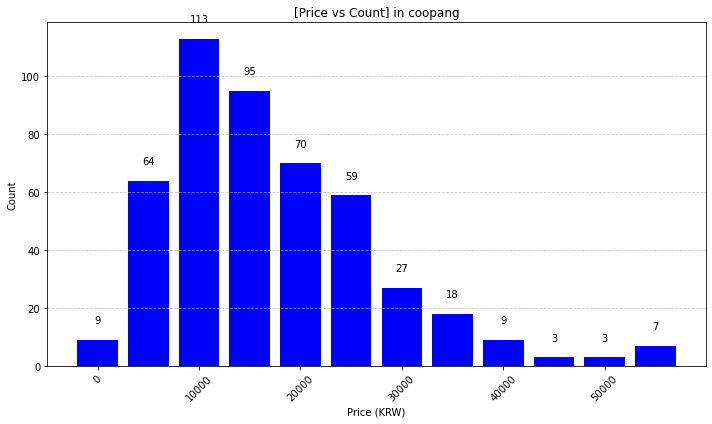

In [9]:
import matplotlib.pyplot as plt

# 가격을 5000원 단위로 나누어 가격 범위 생성
price_ranges = range((coopang['price'].min() // 5000) * 5000, ((coopang['price'].max() + 5000) // 5000) * 5000, 5000)

# 각 가격 범위에 대한 제품 개수 계산
review_counts = []
for price_range in price_ranges:
    filtered_data = coopang[(coopang['price'] >= price_range) & (coopang['price'] < price_range + 5000)]
    review_counts.append(filtered_data['review_cnt'].count())

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(price_ranges, review_counts, color='blue', width=4000)  # 가격 범위 별로 바 그래프 그리기
plt.title('[Price vs Count] in coopang')
plt.xlabel('Price (KRW)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바 위에 값을 표시
for bar, num in zip(bars, review_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5, str(num), 
             ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


## 총리뷰 개수와 5000원단위의 상품의 그래프

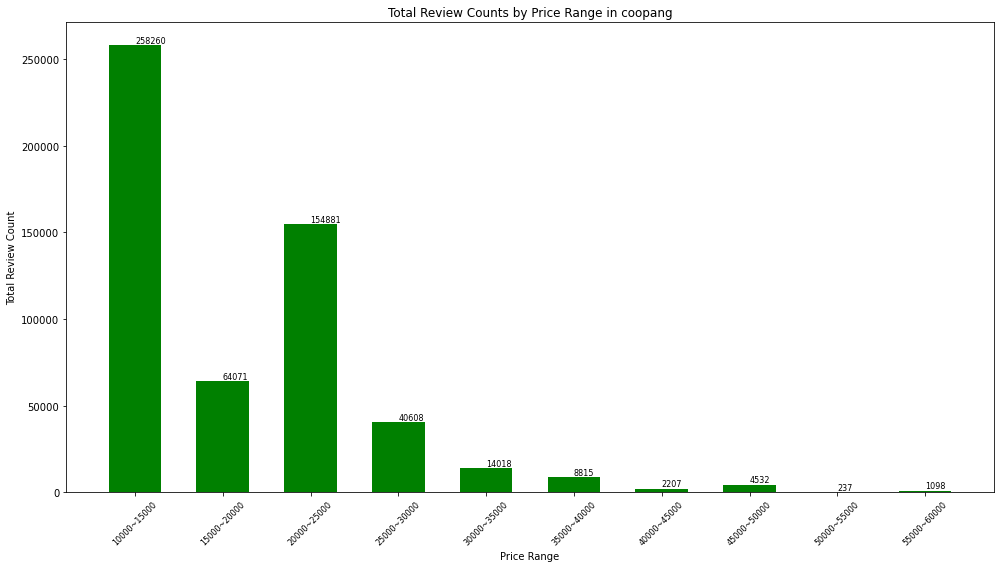

In [11]:


# 5000원 단위 범위 설정
price_ranges = [(10000, 15000), (15000, 20000), (20000, 25000), (25000, 30000),
                (30000, 35000), (35000, 40000), (40000, 45000), (45000, 50000),
                (50000, 55000), (55000, 60000)]

# 각 가격 범위에 대한 review_cnt_total 계산
review_cnt_totals = []
price_range_labels = []

for start_price, end_price in price_ranges:
    # 데이터 필터링
    data = coopang[(coopang.price < end_price) & (coopang.price >= start_price)]
    
    # review_cnt_total 계산
    review_cnt_total = data['review_cnt'].sum()
    review_cnt_totals.append(review_cnt_total)
    price_range_labels.append(f'{start_price}~{end_price}')

# 바 그래프 그리기
plt.figure(figsize=(14, 8))
bars = plt.bar(price_range_labels, review_cnt_totals, color='green', width=0.6)

# 바 그래프 위에 값 작성
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', fontsize=8)

plt.title('Total Review Counts by Price Range in coopang')
plt.xlabel('Price Range')
plt.ylabel('Total Review Count')

plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()